In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\train.csv')

In [3]:
# our data is df_train
x = df_train.drop('TARGET', axis='columns')
y = df_train['TARGET']
x.shape

(76020, 370)

<Axes: xlabel='TARGET', ylabel='count'>

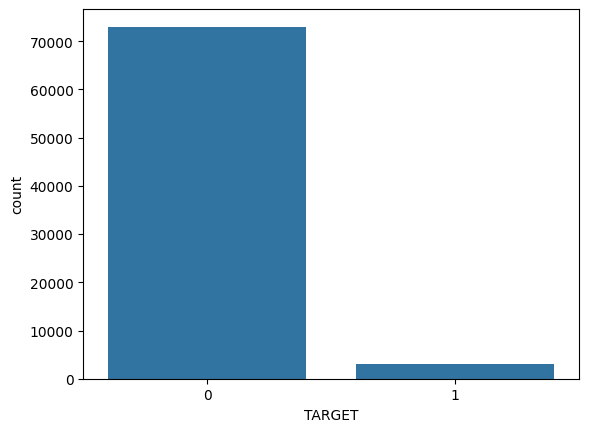

In [4]:
sns.countplot(x=df_train['TARGET'], data=df_train)
# so this imbalance data. we need to balance it by using smote.

## Balance the data by using SMOTE

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)
y_sm.value_counts()
x_sm.shape

(146024, 370)

In [7]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
# pca = PCA(0.95)
x_final = pca.fit_transform(x_sm)
x_final.shape
# o.90 which returns the 90% usefull features and pca is convert values into scaler

(146024, 100)

## StandardScaler

In [8]:
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scl = ss.fit_transform(x_final)

## Spliting the data

In [9]:
# so our finally data is x_final and y_sm.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scl, y_sm, test_size=0.2, random_state=30, stratify=y_sm)

In [10]:
x_train.shape

(116819, 100)

In [11]:
x_test.shape

(29205, 100)

## LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
lr.score(x_test, y_test)

0.6589282657079267

In [22]:
lr.score(x_train,y_train)

0.8901548549465412

In [14]:
from sklearn.metrics import accuracy_score
y_test_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6589282657079267


## DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.9076870398904298

In [17]:
dtc.score(x_train, y_train)

1.0

In [18]:
from sklearn.metrics import accuracy_score
dtc.score(x_test, y_test)
dtc.score(x_train, y_train)
y_test_pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9076870398904298


## RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.9607601438109913

In [20]:
rfc.score(x_train, y_train)

1.0

In [21]:
from sklearn.metrics import accuracy_score
rfc.score(x_test, y_test)
rfc.score(x_train, y_train)
y_test_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9607601438109913


## ROC(Receiver Operating Characteristics)

In [ ]:
# roc on testing data
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, y_test_predict)
roc

In [ ]:
# roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# roc on training data
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_train, y_train_predict)
roc

In [ ]:
# roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
df_test = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\test.csv')
df_test.head()

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0) #Removing both constant and quasi-constant
var_thr.fit(df_test)

In [ ]:
# it returns the true or false ie. true means it is true (it has more than 0 variacne
# so it is important) , false means it has low variance that is not important
var_thr.get_support()
len(df_test.columns[var_thr.get_support()])
# tot is 370 it gives 197 if you give thershold=0.25 (197 col important)

In [ ]:
# here we can columns which having less than o.25 variance
constant_columns = [col for col in df_test.columns if col not in df_test.columns[var_thr.get_support()]]

In [ ]:
# these are deleted cols
len(constant_columns)

In [ ]:
df_test_final = df_test.drop(constant_columns, axis=1)
df_test_final.shape
# so finally we have independant_features are 198.(by using variance_thershold)

In [ ]:
# here we appling the scaling
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_test_scl = ss.fit_transform(df_test_final)

In [ ]:
x_test_predict = rfc.predict(x_test_scl)
x_test_predict

In [78]:
count_0 = 0
count_1 = 0
for i in x_test_predict:
    if i == 1:
        count_1 += 1
    else:
        count_0 += 1
print(f'count_1 is {count_1}')
print(f'count_0 is {count_0}')

count_1 is 75628
count_0 is 190


In [79]:
75628+190

75818

In [81]:
df_test.shape

(75818, 370)

In [2]:
import pandas as pd

# Sample data
array1 = [1, 2, 3, 4, 5]
array2 = ['A', 'B', 'C', 'D', 'E']

# Create DataFrame
df_final_sub = pd.DataFrame({'ID': df_test['ID'], 'Target': x_test_predict})

# Show the DataFrame
print(df_final_sub)

NameError: name 'df_test' is not defined

In [50]:
df_final_sub['Target'].value_counts()

Target
1    75778
0       40
Name: count, dtype: int64

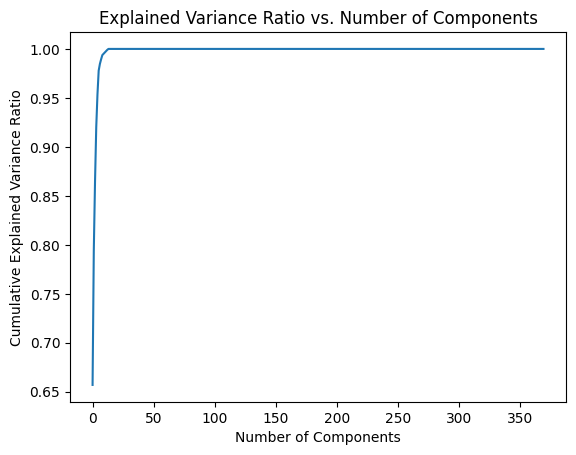

In [51]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA()

# Fit PCA to the data
pca.fit(x_sm)

# Plot cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()


In [1]:
df_final_sub.to_csv('df_final_val2.csv', index=False)

NameError: name 'df_final_sub' is not defined